# ❤️ Classificação de Doença Cardíaca com Gradient Boosting

## 🩺 Sobre o Dataset

Este projeto utiliza o **Cleveland Heart Disease Dataset**, amplamente conhecido por auxiliar na previsão de doenças cardíacas. Ele contém informações clínicas de pacientes, como idade, colesterol, pressão arterial e resultados de exames.

- **Fonte**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
- **Variável-alvo (`target`)**:
  - `0`: Sem Doença Cardíaca
  - `1`: Com Doença Cardíaca (independente do grau)
- **Observações totais**: 303
- **Após remoção de nulos**: 303 → 297 (após tratamento dos `NaN` com **mediana**)

---

## 🚀 Pipeline do Projeto

| Etapa | Descrição |
|-------|-----------|
| 📥 1. Carregamento | Importação direta via `pandas.read_csv` com tratamento de `?` como nulo |
| 🧹 2. Tratamento de Nulos | Colunas `ca` e `thal` preenchidas com a **mediana** |
| 📊 3. Análise Exploratória | `info()`, `isnull()`, `describe()` e `head()` antes e depois da limpeza |
| ✂️ 4. Split dos dados | Separação treino/teste (80/20) com `train_test_split` |
| 🔍 5. Grid Search | Busca da melhor combinação de hiperparâmetros com validação cruzada (cv=5) |
| 🤖 6. Treinamento | Modelo `GradientBoostingClassifier` com regularização |
| 📈 7. Avaliação | Acurácia, classificação, ROC, Precision-Recall, KS e GINI |

---

## 📊 Régua Visual de Avaliação de Métricas de Classificação

| Métrica     | O que mede                                               | Quando usar                                                                 | Interpretação (Régua de Qualidade) |
|-------------|----------------------------------------------------------|------------------------------------------------------------------------------|------------------------------------|
| **🎯 Acurácia** | Proporção total de acertos (positivos e negativos)     | Quando as classes estão **bem balanceadas**                                | ✅ > 0.85 (excelente)<br>🟡 0.75–0.85 (ok)<br>🔴 < 0.75 (baixo) |
| **🎯 Precision** | % de positivos previstos que são realmente positivos  | Quando **falsos positivos são mais graves** (ex: crédito, prisões)         | ✅ > 0.80 (alta confiança)<br>🟡 0.65–0.80 (cuidado)<br>🔴 < 0.65 (alerta de ruído) |
| **🎯 Recall** | % de positivos reais identificados corretamente         | Quando **falsos negativos são mais graves** (ex: doenças, fraudes)         | ✅ > 0.80 (ótima cobertura)<br>🟡 0.65–0.80 (aceitável)<br>🔴 < 0.65 (perigo de omissão) |
| **🎯 F1-Score** | Equilíbrio entre Precision e Recall                    | Quando FP e FN têm **peso similar** ou dados estão desbalanceados          | ✅ > 0.80 (robusto)<br>🟡 0.70–0.80 (ok)<br>🔴 < 0.70 (desequilíbrio crítico) |
| **📈 AUC (ROC)** | Capacidade geral de separação das classes             | Para avaliar **modelo em vários thresholds** (independe de corte)          | ✅ > 0.90 (excelente)<br>🟡 0.80–0.90 (bom)<br>🔴 < 0.80 (fraco ou aleatório) |
| **📈 GINI**    | Variante do AUC: `2*AUC - 1`                            | Muito usado em **score de crédito, churn, risco**                          | ✅ > 0.60 (ótimo)<br>🟡 0.40–0.60 (moderado)<br>🔴 < 0.40 (baixa separação) |
| **📉 KS**      | Distância entre distribuições acumuladas               | Ideal para **modelos de crédito, retenção, churn**                         | ✅ > 0.60 (separação excelente)<br>🟡 0.40–0.60 (adequado)<br>🟠 0.20–0.40 (fraco)<br>🔴 < 0.20 (quase aleatório) |

---

## 📘 Como Interpretar os Resultados

- **Alta acurácia ≠ bom modelo**: pode mascarar problemas de Recall ou Precision.
- **AUC elevado (>0.90)**: indica excelente separação entre classes.
- **F1-score > 0.80**: indica bom equilíbrio entre falso positivo e falso negativo.
- **GINI** e **KS**: métricas robustas para avaliar score preditivo em modelos de risco.

📌 *Ideal para produção: AUC > 0.85, F1 > 0.80 e KS > 0.40*

---

## 📷 Visualizações Geradas

- 🔵 **Matriz de Confusão**
- 🟠 **Curva ROC (com AUC)**
- 🟣 **Curva Precision-Recall**
- 📉 **Métricas de separação (KS e GINI)**

---

## ⚠️ Detecção de Overfitting

O código verifica automaticamente a diferença entre acurácia de treino e teste. Se a diferença for maior que `10%`, é exibido um alerta:

- ⚠️ Possível Overfitting detectado!


---

## 📉 Validação Cruzada

Usamos `cross_val_score` com 5 folds para avaliar a robustez do modelo no conjunto de treino antes do teste final. Isso evita **overfitting** e garante que os resultados não são "sorte".

---

## 🛠️ Requisitos

```bash
pip install numpy pandas scikit-learn seaborn matplotlib


📌 Informações ANTES do tratamento de valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None 

🔍 Quantidade de valores ausentes por coluna:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exa

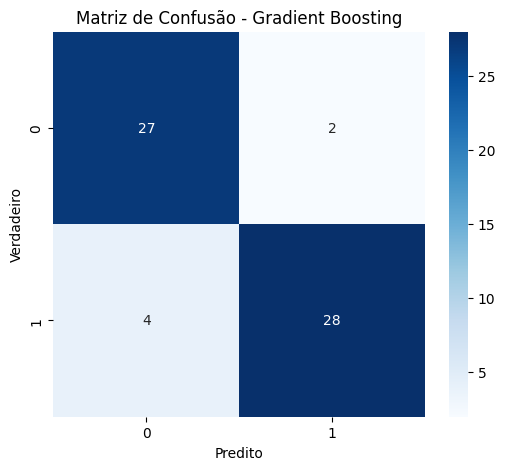

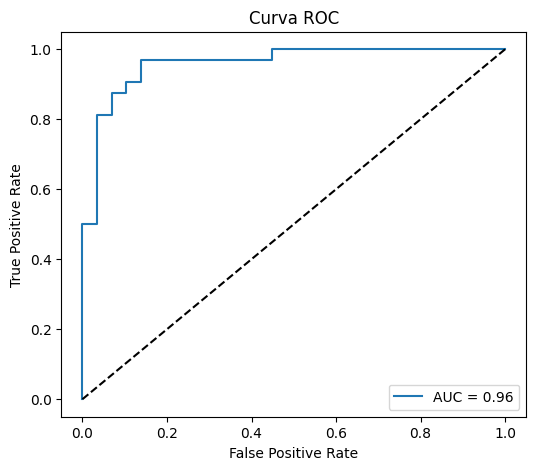

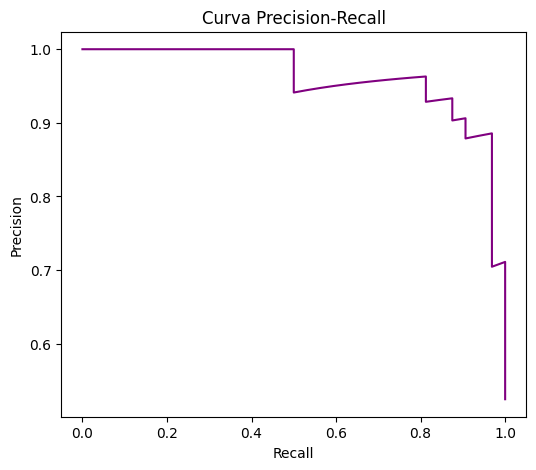

KS: 0.83
GINI: 0.92


In [19]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score, precision_recall_curve
)
from scipy.stats import ks_2samp

# 🔹 Função para carregar o dataset Heart Disease
def carregar_dataset():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
    colunas = [
        'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
    ]
    df = pd.read_csv(url, names=colunas, na_values='?')

    print("📌 Informações ANTES do tratamento de valores nulos:")
    print(df.info(), "\n")

    print("🔍 Quantidade de valores ausentes por coluna:")
    print(df.isnull().sum(), "\n")

    # Preenchendo valores nulos com a mediana de cada coluna
    df['ca'] = df['ca'].fillna(df['ca'].median())
    df['thal'] = df['thal'].fillna(df['thal'].median())


    print("📌 Informações DEPOIS do tratamento de valores nulos:")
    print(df.info(), "\n")

    print("📌 Estatísticas descritivas do dataset:")
    print(df.describe(), "\n")

    print("📌 Primeiras 5 linhas do dataset Heart Disease:")
    print(df.head(), "\n")

    X = df.drop(columns=['target'])
    y = df['target'].apply(lambda x: 1 if x > 0 else 0)
    return X, y

# 🔹 Avaliação do modelo com várias métricas e gráficos
def avaliar_modelo(modelo, X_train, y_train, X_test, y_test):
    y_pred_train = modelo.predict(X_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred)
    cv_score = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy').mean()

    print(f"✅ Acurácia no Treino: {acc_train:.2f}")
    print(f"✅ Acurácia no Teste: {acc_test:.2f}")
    print(f"📉 Validação Cruzada (Treino): {cv_score:.2f}")

    if acc_train - acc_test > 0.10:
        print("⚠️ Possível Overfitting detectado!\n")

    print("\n📊 Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.title("Matriz de Confusão - Gradient Boosting")
    plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC")
    plt.legend()
    plt.show()

    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color='purple')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Curva Precision-Recall")
    plt.show()

    # KS e GINI
    ks = ks_2samp(y_prob[y_test == 1], y_prob[y_test == 0]).statistic
    gini = 2 * auc_score - 1
    print(f"KS: {ks:.2f}")
    print(f"GINI: {gini:.2f}")

# 🚀 Execução principal
X, y = carregar_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔍 Hiperparâmetros com regularização para evitar overfitting
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.6, 0.8, 1.0]
}
grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)
melhor_modelo = grid.best_estimator_

print(f"\n🏆 Melhor combinação de parâmetros: {grid.best_params_}")
avaliar_modelo(melhor_modelo, X_train, y_train, X_test, y_test)
